In [20]:
import pandas as pd
import os


# Define the path to the parent folder
parent_folder = '../data'

# Define the paths to the two subfolders
folder1 = os.path.join(parent_folder, 'raw_analyst_ratings')
folder2 = os.path.join(parent_folder, 'yfinance_data')

# List all CSV files in raw_analyst_ratings
csv_files_folder1 = [os.path.join(folder1, file) for file in os.listdir(folder1) if file.endswith('.csv')]

# List all CSV files in yfinance_data
csv_files_folder2 = [os.path.join(folder2, file) for file in os.listdir(folder2) if file.endswith('.csv')]

# Read CSV files from raw_analyst_ratings
dfs_folder1 = [pd.read_csv(file) for file in csv_files_folder1]

# Read CSV files from yfinance_data
dfs_folder2 = [pd.read_csv(file) for file in csv_files_folder2]

print(csv_files_folder1,csv_files_folder2)


['../data\\raw_analyst_ratings\\raw_analyst_ratings.csv'] ['../data\\yfinance_data\\AAPL_historical_data.csv', '../data\\yfinance_data\\AMZN_historical_data.csv', '../data\\yfinance_data\\GOOG_historical_data.csv', '../data\\yfinance_data\\META_historical_data.csv', '../data\\yfinance_data\\MSFT_historical_data.csv', '../data\\yfinance_data\\NVDA_historical_data.csv', '../data\\yfinance_data\\TSLA_historical_data.csv']


In [21]:
for data in dfs_folder2:
    print(data.head())
  



         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3  1997-05-20  0.086458  0.0875

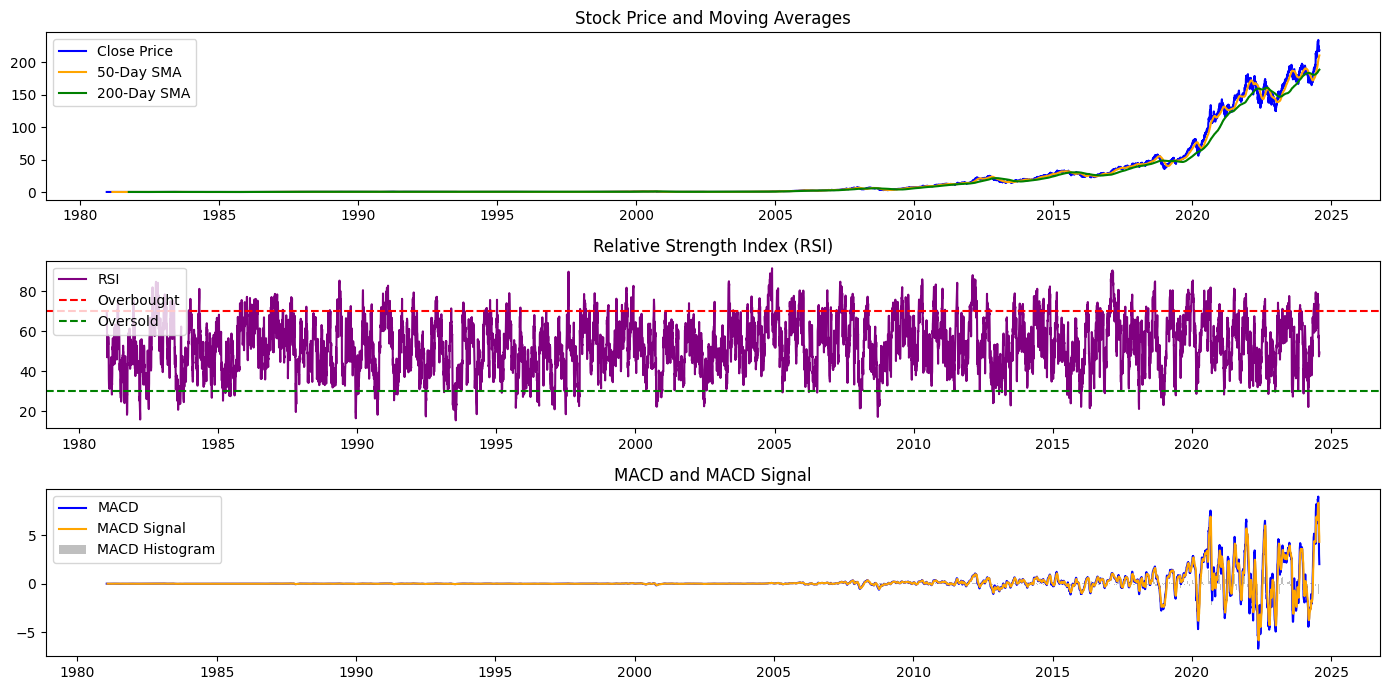

In [26]:
import pandas as pd
import os
import ta
import matplotlib.pyplot as plt

# Define the path to the parent folder
parent_folder = '../data'

# Define the paths to the two subfolders
folder1 = os.path.join(parent_folder, 'raw_analyst_ratings')
folder2 = os.path.join(parent_folder, 'yfinance_data')

# List all CSV files in raw_analyst_ratings
csv_files_folder1 = [os.path.join(folder1, file) for file in os.listdir(folder1) if file.endswith('.csv')]

# List all CSV files in yfinance_data
csv_files_folder2 = [os.path.join(folder2, file) for file in os.listdir(folder2) if file.endswith('.csv')]

# Read CSV files from raw_analyst_ratings
dfs_folder1 = [pd.read_csv(file) for file in csv_files_folder1]

# Read CSV files from yfinance_data
dfs_folder2 = [pd.read_csv(file) for file in csv_files_folder2]

# For demonstration, let's use the first DataFrame from yfinance_data
data = dfs_folder2[0].copy()  # Make a copy of the DataFrame

# Ensure the DataFrame contains necessary columns
data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Calculate Moving Averages
data.loc[:, 'SMA_50'] = ta.trend.sma_indicator(data['Close'], window=50)
data.loc[:, 'SMA_200'] = ta.trend.sma_indicator(data['Close'], window=200)

# Calculate RSI
data.loc[:, 'RSI'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()

# Calculate MACD
macd = ta.trend.MACD(data['Close'])
data.loc[:, 'MACD'] = macd.macd()
data.loc[:, 'MACD_signal'] = macd.macd_signal()
data.loc[:, 'MACD_hist'] = macd.macd_diff()

# Visualize the data
plt.figure(figsize=(14, 7))

# Plot Closing Price with Moving Averages
plt.subplot(3, 1, 1)
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data['SMA_200'], label='200-Day SMA', color='green')
plt.title('Stock Price and Moving Averages')
plt.legend(loc='upper left')

# Plot RSI
plt.subplot(3, 1, 2)
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.legend(loc='upper left')

# Plot MACD
plt.subplot(3, 1, 3)
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['MACD_signal'], label='MACD Signal', color='orange')
plt.bar(data.index, data['MACD_hist'], label='MACD Histogram', color='gray', alpha=0.5)
plt.title('MACD and MACD Signal')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
